# Accuracy Metric Uncertainty

This notebook provides an example how Probatus can be used to estimate the uncertainty around the performance metric of a given model.

In [1]:
from probatus.metric_uncertainty import VolatilityEstimation
from probatus.datasets import lending_club
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Loading Data

For the example we use the lending club data that is already provided in Probatus and we will build a model and investigate the uncertainty around the AUC.

In [2]:
# Load data and build the model
data = lending_club(modelling_mode = False)[0]
y = data['default']
X = data.drop(['id', 'loan_issue_date','default'], axis = 1)

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=6,
                               max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                               min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                               oob_score=False, random_state=0, verbose=0, warm_start=False)

model.fit(X, y)

# defining the metrics we are interested in
evaluators = {'AUC' : [roc_auc_score, 'proba']}

### Running Uncertainty Evaluation

#### Bootstrap replicates

First fitting the localised bootstrap replicates with overlap

In [3]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_seed')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.4, 1000)

100%|██████████| 1000/1000 [05:03<00:00,  3.29it/s]


The uncertainty is provided in terms of the standard deviation.

In [4]:
checker.get_report('AUC')

,mean_train,mean_test,mean_delta,std_train,std_test,std_delta
AUC,0.92,0.71,0.21,0.00936,0.0196,0.02263


and histograms allow to see the differences between the train and the test sets.

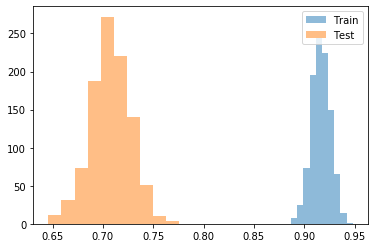

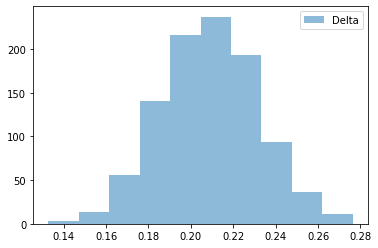

In [5]:
checker.plot('AUC')

#### Global bootstrap non overlapping k folds

The number of max folds is determined by the nature of the data: what is the maximum number of folds to ensure there is balanced number of classed in each fold.

In [6]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_global')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.1)

100%|██████████| 11/11 [00:10<00:00,  1.06it/s]


In [7]:
checker.get_report('AUC')

,mean_train,mean_test,mean_delta,std_train,std_test,std_delta
AUC,0.98,0.66,0.32,0.00001,0.00093,0.00099


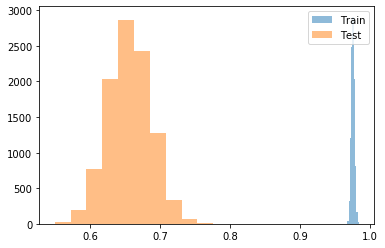

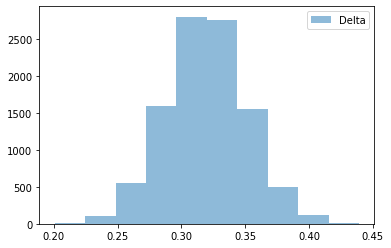

In [8]:
checker.plot('AUC')